Repo: https://github.com/mohan-mj/Activity-Detection-using-IMU-sensor

In [17]:
#from __future__ import print_function
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
#import coremltools
from scipy import stats
#from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Reshape
# from keras.layers import Conv2D, MaxPooling2D
# from keras.utils import np_utils

In [18]:
def read_data(file_path):
    column_names = ['X_a','Y_a','Z_a','X_m','Y_m','Z_m','X_g','Y_g','Z_g', 'timestamp', 'grade', 'exercise']
    df = pd.read_csv(file_path,
                     header=None,
                     names=column_names)
    # # Last column has a ";" character which must be removed ...
    # df['z-axis'].replace(regex=True,
    #   inplace=True,
    #   to_replace=r';',
    #   value=r'')
    # # ... and then this column must be transformed to float explicitly
    # df['z-axis'] = df['z-axis'].apply(convert_to_float)
    # # This is very important otherwise the model will not fit and loss
    # # will show up as NAN
    # df.dropna(axis=0, how='any', inplace=True)

    return df

def convert_to_float(x):

    try:
        return np.float(x)
    except:
        return np.nan

def show_basic_dataframe_info(dataframe):

    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

# Load data set containing all the data from csv
# CHANGE THIS LINE TO SEE OTHER FILES
df = read_data('../IMU_data//data9.csv')

# Describe the data
show_basic_dataframe_info(df)
df.head()

# print(df['timestamp'][0])

df['timestamp'] = (df['timestamp'] - df['timestamp'][0])/1000   
df.head()

Number of columns in the dataframe: 12
Number of rows in the dataframe: 145



,X_a,Y_a,Z_a,X_m,Y_m,Z_m,X_g,Y_g,Z_g,timestamp,grade,exercise
0,46,-38,96,20,91,4,-43,28,9,0.000,1,bicep curl
1,54,-12,76,24,84,0,-48,-2,25,0.312,1,bicep curl
2,50,22,90,26,74,-5,-42,-9,21,0.624,1,bicep curl
3,43,45,86,27,64,-7,-38,10,9,0.936,1,bicep curl
4,40,62,70,29,57,-6,-30,8,8,1.248,1,bicep curl


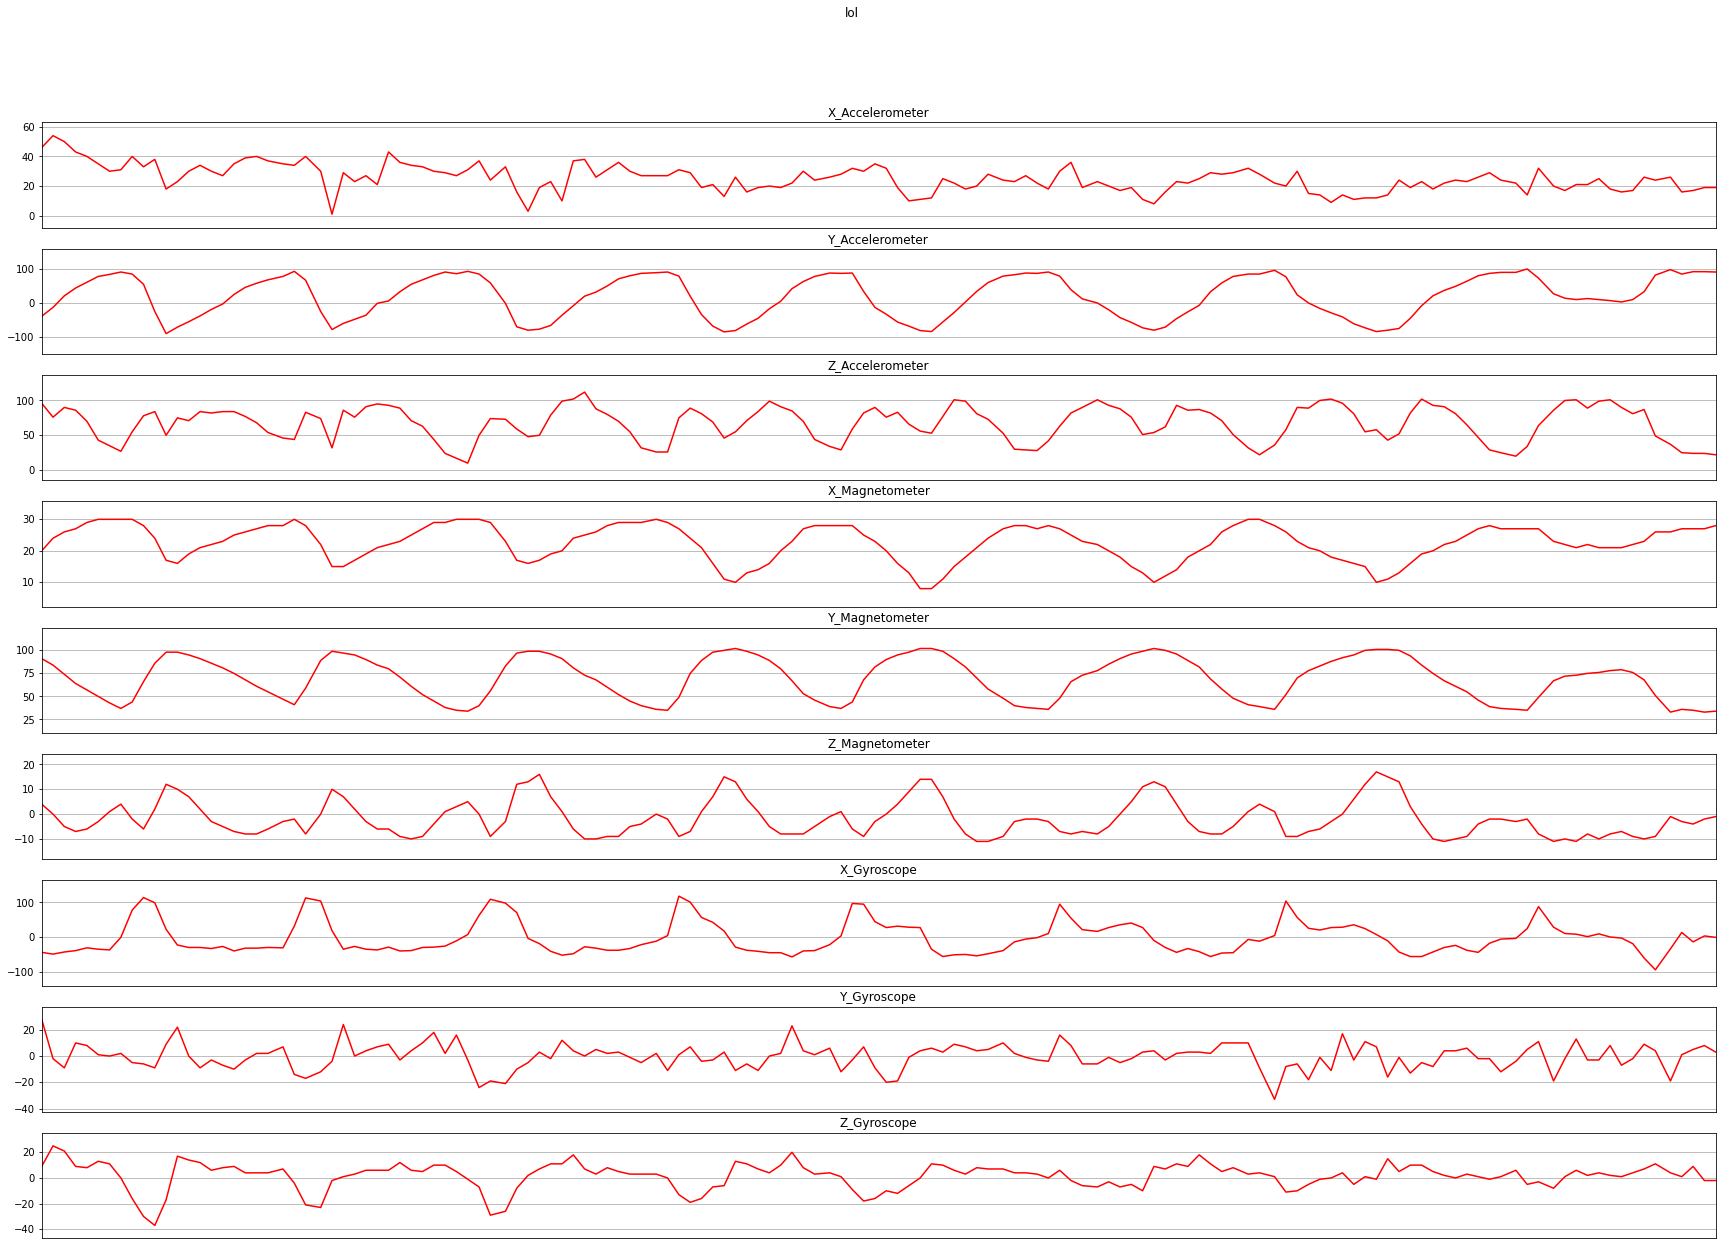

In [19]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(nrows=9,
         figsize=(30, 20),
         sharex=True)
    plot_axis(ax0, data['timestamp'], data['X_a'], 'X_Accelerometer')
    plot_axis(ax1, data['timestamp'], data['Y_a'], 'Y_Accelerometer')
    plot_axis(ax2, data['timestamp'], data['Z_a'], 'Z_Accelerometer')

    plot_axis(ax3, data['timestamp'], data['X_m'], 'X_Magnetometer')
    plot_axis(ax4, data['timestamp'], data['Y_m'], 'Y_Magnetometer')
    plot_axis(ax5, data['timestamp'], data['Z_m'], 'Z_Magnetometer')
    
    plot_axis(ax6, data['timestamp'], data['X_g'], 'X_Gyroscope')
    plot_axis(ax7, data['timestamp'], data['Y_g'], 'Y_Gyroscope')
    plot_axis(ax8, data['timestamp'], data['Z_g'], 'Z_Gyroscope')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

subset = df[:180]
plot_activity("lol", subset)

# for activity in np.unique(df['activity']):
    # subset = df[df['activity'] == activity][:180]
    # plot_activity(activity, subset)